In [2]:
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from keras.preprocessing import image

explainer = lime_image.LimeImageExplainer()

In [3]:

import os
import shutil

folder1 = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0'
folder2 = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/1'
destination = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/'

files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

for file in files1:
    source = os.path.join(folder1, file)
    shutil.copy(source, destination)

for file in files2:
    source = os.path.join(folder2, file)
    shutil.copy(source, destination)



In [4]:
folder1 = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0'
folder2 = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/1'
destination = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/'

files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

for file in files1:
    source = os.path.join(folder1, file)
    shutil.copy(source, destination)

for file in files2:
    source = os.path.join(folder2, file)
    shutil.copy(source, destination)



In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('C:/Users/hp/Downloads/archive (1)/dogvscat/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 500 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/hp/Downloads/archive (1)/dogvscat/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 50 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
16/16 [==============================] - 14s 803ms/step - loss: 0.7153 - accuracy: 0.4860 - val_loss: 0.6904 - val_accuracy: 0.5200
Epoch 2/25
16/16 [==============================] - 11s 655ms/step - loss: 0.6907 - accuracy: 0.5520 - val_loss: 0.6901 - val_accuracy: 0.5200
Epoch 3/25
16/16 [==============================] - 10s 622ms/step - loss: 0.6769 - accuracy: 0.5880 - val_loss: 0.6690 - val_accuracy: 0.5600
Epoch 4/25
16/16 [==============================] - 10s 651ms/step - loss: 0.6548 - accuracy: 0.5980 - val_loss: 0.6933 - val_accuracy: 0.5400
Epoch 5/25
16/16 [==============================] - 12s 720ms/step - loss: 0.6541 - accuracy: 0.6140 - val_loss: 0.6885 - val_accuracy: 0.5800
Epoch 6/25
16/16 [==============================] - 10s 610ms/step - loss: 0.6195 - accuracy: 0.6580 - val_loss: 0.8770 - val_accuracy: 0.5400
Epoch 7/25
16/16 [==============================] - 8s 511ms/step - loss: 0.6278 - accuracy: 0.6420 - val_loss: 0.6895 - val_accuracy: 0.5600


In [9]:
test_image = image.load_img(
    'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0/216.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print("Before FGSM attack "prediction)

cat


  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


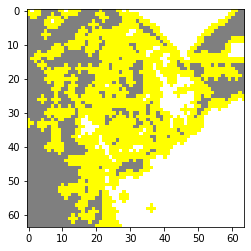

In [10]:
explanation = explainer.explain_instance(test_image[0], cnn.predict, top_labels=2, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=True)
image_boundry = mark_boundaries(temp/2 + 0.5, mask)
plt.imshow(image_boundry)
plt.savefig('LIME_image.png')


In [11]:
import pandas as pd

features = explanation.local_exp[explanation.top_labels[0]]

df = pd.DataFrame(features, columns=['feature_index', 'importance_score'])
df.set_index('feature_index', inplace=True)
print(df)


               importance_score
feature_index                  
0                     -0.008060
19                    -0.007673
2                     -0.007472
21                    -0.007463
27                    -0.006593
17                     0.006424
12                     0.006133
29                     0.006116
14                    -0.006055
28                    -0.005793
4                      0.005770
7                     -0.005539
10                     0.004686
13                     0.004137
30                     0.004002
25                    -0.003334
31                    -0.003254
22                    -0.003213
23                     0.003149
32                    -0.003066
16                    -0.003000
20                    -0.002726
8                     -0.002242
6                      0.002042
5                     -0.001838
11                     0.001585
18                     0.001476
9                     -0.001201
15                     0.001193
3       

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AttributeError: 'ImageExplanation' object has no attribute 'as_map'

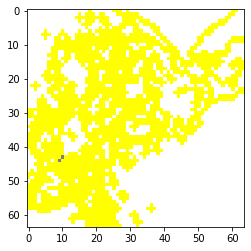

<Figure size 720x576 with 0 Axes>

In [12]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(test_image[0], cnn.predict, top_labels=1, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
heatmap = mark_boundaries(temp/2 + 0.5, mask)
plt.imshow(heatmap)

plt.figure(figsize=(10,8))
plt.imshow(explanation.as_map())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


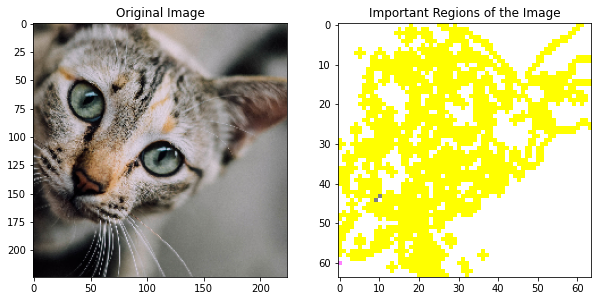

    feature  importance_score
5         4          0.008753
7        18          0.008294
8        34          0.008198
9        35          0.008171
13       14          0.006821
14       32          0.006554
15       13          0.006044
18       15          0.003279
22        6          0.002604
23       22          0.002438
24        0          0.002095
25       24          0.002020
33       16          0.000687
34       20          0.000510
35       23          0.000081
32       29         -0.000893
31       12         -0.001226
30       10         -0.001424
29       25         -0.001484
28       27         -0.001599
27        9         -0.001773
26        7         -0.001811
21       21         -0.002801
20       28         -0.002809
19        1         -0.002869
17       26         -0.003455
16        5         -0.003827
12       33         -0.007187
11        8         -0.007329
10        3         -0.007419
6        11         -0.008354
4         2         -0.009091
3        3

In [13]:
img_path = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0/216.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_arr = image.img_to_array(img)
img_arr /= 255.
img_arr = np.expand_dims(img_arr, axis=0)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
heatmap = mark_boundaries(temp / 2 + 0.5, mask)

# Plot the image and the heat map
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_arr[0])
ax[0].set_title('Original Image')
ax[1].imshow(heatmap)
ax[1].set_title('Important Regions of the Image')
plt.show()

scores = dict(explanation.local_exp[explanation.top_labels[0]])
df = pd.DataFrame(list(scores.items()), columns=['feature', 'importance_score'])
df = df.sort_values('importance_score', ascending=False)
print(df)



keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


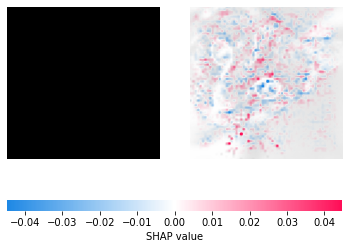

In [14]:
import shap

test_image = image.load_img(
    'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0/216.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

explainer = shap.DeepExplainer(cnn, training_set[0][0])
shap_values = explainer.shap_values(test_image)

shap.image_plot(shap_values, -test_image)

In [15]:
from keras.preprocessing import image

In [16]:
epsilon = 0.1
data_format = 'channels_last'

In [17]:
img_path = 'C:/Users/hp/Downloads/archive (1)/dogvscat/train/0/216.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

In [21]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y_true = tf.convert_to_tensor([0], dtype=tf.float32)
loss_object = tf.keras.losses.BinaryCrossentropy()
with tf.GradientTape() as tape:
    tape.watch(x)
    prediction = cnn(x)
    loss = loss_object(y_true, prediction)
grads = tape.gradient(loss, x)


In [22]:
perturbation = epsilon * tf.sign(grads)
perturbed_x = x + perturbation
perturbed_x = tf.clip_by_value(perturbed_x, 0, 1)

In [23]:
prediction = cnn(perturbed_x).numpy()[0][0]
if prediction > 0.5:
    label = 'dog'
else:
    label = 'cat'
print('Prediction after FGSM attack:', label)

Prediction after FGSM attack: dog


  0%|          | 0/1000 [00:00<?, ?it/s]

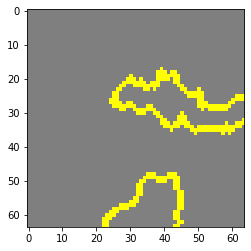

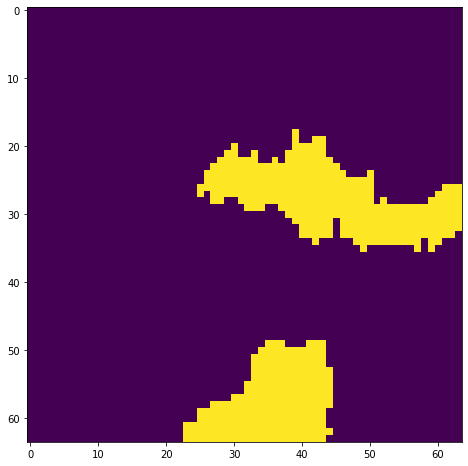

In [40]:

img = perturbed_x[0]

explainer = lime_image.LimeImageExplainer()
img = tf.convert_to_tensor(img, dtype=tf.float32) / 255.0
img = tf.reshape(img, (1, img.shape[0], img.shape[1], img.shape[2]))

explanation = explainer.explain_instance(img[0].numpy(), cnn.predict, top_labels=1, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
heatmap = mark_boundaries(temp/2 + 0.5, mask)
plt.imshow(heatmap)

plt.figure(figsize=(10,8))
plt.imshow(mask.astype(np.float32))
